### Test Code for Module NB

In [1]:
include("./script.jl")
import .NB

In [2]:
include("../tools.jl")
import .JuTools

In [3]:
import Plots
import Random

In [4]:
X_data1, Y_data1 = JuTools.data_generate_cluster_2d(pos1=(20.0, 20.0), pos2=(50.0, 50.0),
    radius1=5.0, radius2=5.0, random_scale=8.0, data_size=1000)
println(size(X_data1))
println(size(Y_data1))

(1000, 2)
(1000,)


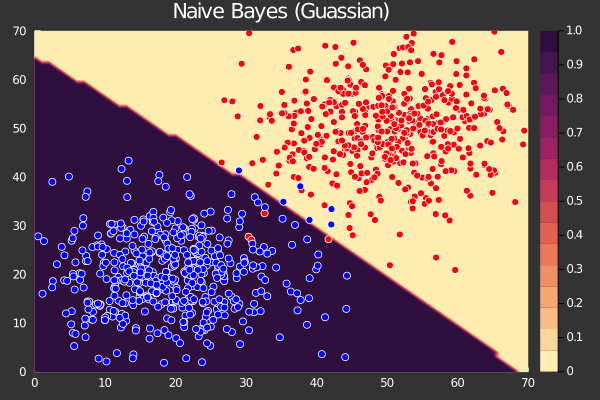

In [5]:
trained = NB.train(X_data1, Y_data1)
plot_X1 = [X_data1[i, 1] for i in 1:(size(X_data1)[1]) if Y_data1[i] == 0.0]
plot_Y1 = [X_data1[i, 2] for i in 1:(size(X_data1)[1]) if Y_data1[i] == 0.0]
plot_X2 = [X_data1[i, 1] for i in 1:(size(X_data1)[1]) if Y_data1[i] == 1.0]
plot_Y2 = [X_data1[i, 2] for i in 1:(size(X_data1)[1]) if Y_data1[i] == 1.0]
X_test_1 = 0:70
X_test_2 = 0:70
X_test_contour = hcat(vec(repeat(reshape(X_test_1, :, 1), 1, 71)'), vec(repeat(X_test_2, 71, 1)))
X_test_contour = reshape(NB.predict(X_test_contour, trained), 71, :)
Plots.gr()
Plots.contour(X_test_1, X_test_2, X_test_contour, fill=true, c=Plots.cgrad(:matter, rev=false, categorical=false),
    linewidth=0, background_color=Plots.RGB(0.2, 0.2, 0.2))
Plots.scatter!(plot_X1, plot_Y1, leg=false, c="red")
Plots.scatter!(plot_X2, plot_Y2, leg=false, c="blue")
Plots.xlims!((0.0, 70.0))
Plots.ylims!((0.0, 70.0))
Plots.title!("Naive Bayes (Guassian)")